In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

## Data Load and Preprocessing

In [21]:

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [22]:
# Check data shape
x_train.shape

(50000, 32, 32, 3)

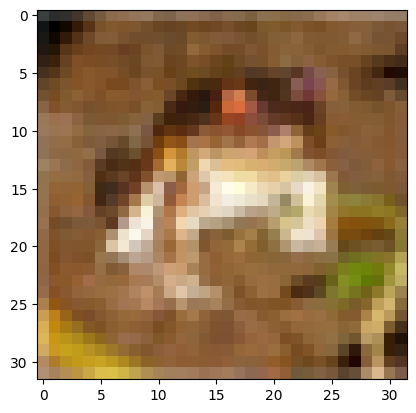

In [23]:
# Show first image
plt.imshow(x_train[0])
plt.show()

In [24]:
# Normalize pixel values to a range between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [25]:
# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [26]:
print("Original label:", y_train[0])
print("After one-hot encoding:", y_train_cat[0])

Original label: [6]
After one-hot encoding: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Building the CNN Model
With our data fully prepared, we're ready for the most exciting part: building the brain of our operation. A CNN is constructed by stacking different types of layers, each with a specific job.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom


model = Sequential()

#Data augmentation layer
model.add(RandomFlip('horizontal', input_shape=(32,32,3)))
model.add(RandomRotation(0.1))
model.add(RandomZoom(0.1))

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Second Convolutional Block
model.add(Conv2D(filters = 64, kernel_size =(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#Flatten features in a 1D vector
model.add(Flatten())
#Add Dense layer for classification
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
# Output Layer
model.add(Dense(units=10, activation='softmax'))
#Show a summary on the model architecture
model.summary()





/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 32, 32, 3)      │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 167,562 (654.54 KB)

 Trainable params: 167,562 (654.54 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Set early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

#Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

print("Model is compiled and ready to be trained🚀")

Model is compiled and ready to be trained🚀


In [29]:
# Train model
print("Training Started...")

history = model.fit(x_train, y_train_cat,
                    epochs=50,
                    validation_data=(x_test, y_test_cat),
                    callbacks = [early_stopping],
                    verbose=1
                    )

print("¡Train finished!")

Training Started...
Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.2952 - loss: 1.9094 - val_accuracy: 0.4921 - val_loss: 1.3823
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4468 - loss: 1.5347 - val_accuracy: 0.5256 - val_loss: 1.3078
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.4881 - loss: 1.4214 - val_accuracy: 0.5612 - val_loss: 1.2118
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5097 - loss: 1.3680 - val_accuracy: 0.5749 - val_loss: 1.1725
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5318 - loss: 1.3163 - val_accuracy: 0.6001 - val_loss: 1.1213
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5464 - loss: 1.2795 - val_accuracy: 0.5986 - val_loss: 1.1342
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5496 - loss: 1.2671 - val_accuracy: 0.5997 - val_loss: 1.1285
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accura

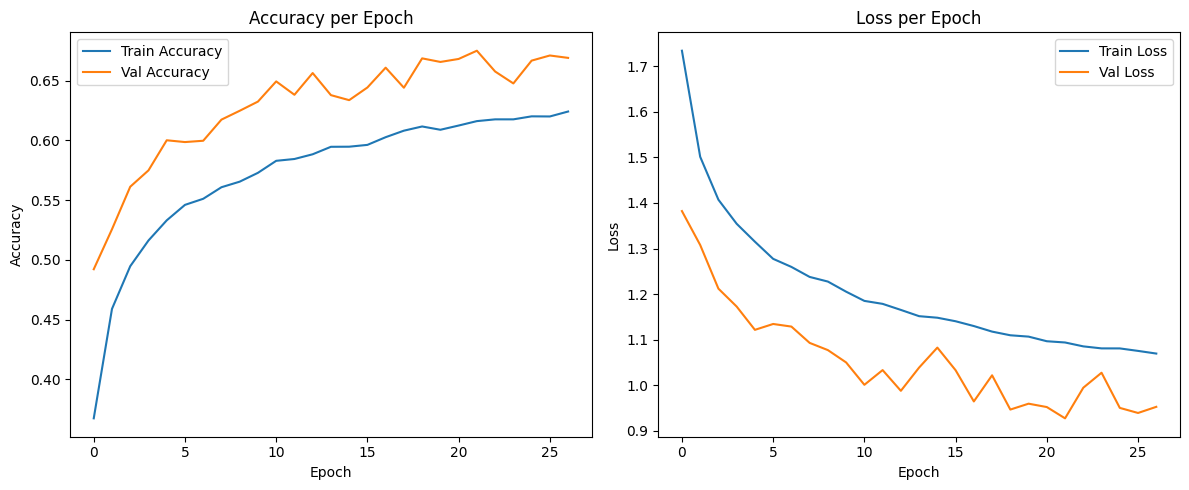

In [34]:
#Visualize Training
import pandas as pd
import matplotlib.pyplot as plt

# Convert history to a Pandas Dataframe
history_df = pd.DataFrame(history.history)

# Accuracy Plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Val Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
#Evaluate Overal Performance (test data)
loss, accuracy = model.evaluate(x_test, y_test_cat, verbose=0)

print(f'\nGlobal Accuracy in test dataset: {accuracy * 100:.2f}%')


Global Accuracy in test dataset: 67.51%


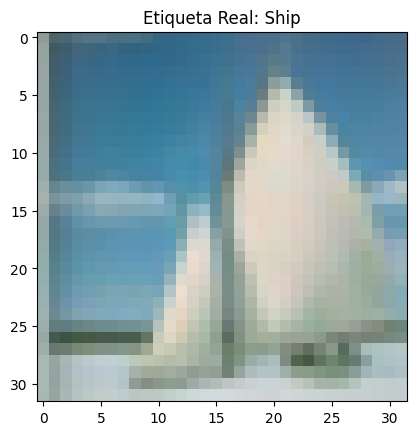

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
According to the model this image is a: Ship


In [39]:
#Make predictions
import numpy as np

#Create a translatin list of class names
class_names = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Select one image from test set randomly
random_index = np.random.randint(0, len(x_test))
random_image = x_test[random_index]
true_label_index = y_test[random_index][0]

# Show the image
plt.imshow(random_image)
plt.title(f"Etiqueta Real: {class_names[true_label_index]}")
plt.show()

# Preproces image for prediction
image_for_prediction = np.expand_dims(random_image, axis=0)

# Make prediction
predictions = model.predict(image_for_prediction)

# Get most probable class
predicted_index = np.argmax(predictions)

print(f'According to the model this image is a: {class_names[predicted_index]}')